In [1]:
import os
from random import randint
import cv2
import numpy as np
import torch
from matplotlib import animation
from torch.utils.data import Dataset
from torchvision import datasets, transforms
import imageio
import os
from PIL import Image
from torchvision import transforms
import pandas as pd
import random
from scipy import ndimage
import dataset

In [2]:
import json

In [3]:
# import torch
# import torch.nn
# import numpy as np
# import math
# import os
# import os.path
# from scipy import ndimage
# from torchvision import transforms
# from scipy import ndimage

# class AnnoDataset(torch.utils.data.Dataset):
#     def __init__(self, directory, set = "train"):
#         super().__init__()
#         self.root = directory
#         self.se = set
#         self.input_size = 224
#         self.lispath = self.get_directory_paths()
#     def get_directory_paths(self):
#         file_paths = []
#         if self.se == 'train':
#             root_dir = os.path.join(self.root, self.se)
#             for rout, dirs, files in os.walk(root_dir):
#                 if not dirs:
#                     for f in files:
#                         file_paths.append(os.path.join(rout, f))
#             return file_paths
#         elif self.se == 'test':
#             root_dir = os.path.join(self.root, self.se)
#             for rout, dirs, files in os.walk(root_dir):
#                 if not dirs:
#                     for f in files:
#                         file_paths.append(os.path.join(rout, f))
#             return file_paths            
#     def __getitem__(self, idx):
#         if self.se == "train":
# #             img = imageio.imread(self.lispath[idx])
#             img = Image.open(self.lispath[idx])
#             img = np.array(img)
#             filenames = self.lispath[idx][-13:-3]
#             if len(img.shape) == 2:
#                 img = np.stack([img] * 3, 2)
#             img = Image.fromarray(img)
#             img = transforms.Resize(self.input_size)(img)
#             img = transforms.RandomResizedCrop(size=self.input_size,scale=(0.4, 0.75),ratio=(0.5,1.5))(img)
#             img = transforms.RandomCrop(self.input_size)(img)
#             img = transforms.RandomHorizontalFlip()(img)
#             img = transforms.ColorJitter(brightness=0.2, contrast=0.2)(img)
#             img = transforms.ToTensor()(img)
#             img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(img)
#             target  = None
#         elif self.se == 'test':
#             img = Image.open(self.lispath[idx])
#             img = np.array(img)
#             filenames = self.lispath[idx][-13:-3]
#             if len(img.shape) == 2:
#                 img = np.stack([img] * 3, 2)
#             img = Image.fromarray(img)
#             img = transforms.Resize(self.input_size)(img)
# #             img = transforms.RandomResizedCrop(size=self.input_size,scale=(0.4, 0.75),ratio=(0.5,1.5))(img)
# #             img = transforms.RandomCrop(self.input_size)(img)
# #             img = transforms.RandomHorizontalFlip()(img)
# #             img = transforms.ColorJitter(brightness=0.2, contrast=0.2)(img)
#             img = transforms.ToTensor()(img)
#             img = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(img)
#             target  = None
#         return  {'image': img, "filenames": filenames, "label": target}
#     def __len__(self):
#         return len(self.lispath)

In [4]:
from helpers import *

In [5]:
num = 40

In [6]:
with open(f'./test_args/args{num}.json', 'r') as f:
    args = json.load(f)
    args['arg_num'] = num
    args = defaultdict_from_json(args)

In [7]:
device = 'cuda'

In [8]:
# args, output = load_parameters(device, arg_num)

In [9]:
directory = r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brainMRI"

In [10]:
training_dataset, ano_dataset = dataset.init_datasets(directory, args)

In [11]:
# trainset = AnnoDataset(directory)

In [12]:
ano_dataset.mfile_paths

['DATASETS/brainMRI\\ground_truth\\bad\\Y1.png',
 'DATASETS/brainMRI\\ground_truth\\bad\\Y10.png',
 'DATASETS/brainMRI\\ground_truth\\bad\\Y100.png',
 'DATASETS/brainMRI\\ground_truth\\bad\\Y101.png',
 'DATASETS/brainMRI\\ground_truth\\bad\\Y102.png',
 'DATASETS/brainMRI\\ground_truth\\bad\\Y103.png',
 'DATASETS/brainMRI\\ground_truth\\bad\\Y104.png',
 'DATASETS/brainMRI\\ground_truth\\bad\\Y105.png',
 'DATASETS/brainMRI\\ground_truth\\bad\\Y106.png',
 'DATASETS/brainMRI\\ground_truth\\bad\\Y107.png',
 'DATASETS/brainMRI\\ground_truth\\bad\\Y108.png',
 'DATASETS/brainMRI\\ground_truth\\bad\\Y109.png',
 'DATASETS/brainMRI\\ground_truth\\bad\\Y11.png',
 'DATASETS/brainMRI\\ground_truth\\bad\\Y111.png',
 'DATASETS/brainMRI\\ground_truth\\bad\\Y112.png',
 'DATASETS/brainMRI\\ground_truth\\bad\\Y113.png',
 'DATASETS/brainMRI\\ground_truth\\bad\\Y114.png',
 'DATASETS/brainMRI\\ground_truth\\bad\\Y115.png',
 'DATASETS/brainMRI\\ground_truth\\bad\\Y116.png',
 'DATASETS/brainMRI\\ground_truth\\

In [13]:
len(ano_dataset.file_names)

164

In [14]:
# ano_dataset.lispath[10]

In [15]:
# for i in ano_dataset:
#     print(i['filenames'])

Y1.png
Y10.png
Y100.png
Y101.png
Y102.png
Y103.png
Y104.png
Y105.png
Y106.png
Y107.png
Y108.png
Y109.png
Y11.png
Y111.png
Y112.png
Y113.png
Y114.png
Y115.png
Y116.png
Y117.png
Y12.png
Y120.png
Y13.png
Y14.png
Y146.png
Y147.png
Y148.png
Y15.png
Y153.png
Y154.png
Y155.png
Y156.png
Y157.png
Y158.png
Y159.png
Y16.png
Y160.png
Y161.png
Y162.png
Y163.png
Y164.png
Y165.png
Y166.png
Y167.png
Y168.png
Y169.png
Y17.png
Y170.png
Y18.png
Y180.png
Y181.png
Y182.png
Y183.png
Y184.png
Y185.png
Y186.png
Y187.png
Y188.png
Y19.png
Y192.png
Y193.png
Y194.png
Y195.png
Y2.png
Y20.png
Y21.png
Y22.png
Y23.png
Y24.png
Y242.png
Y243.png
Y244.png
Y245.png
Y246.png
Y247.png
Y248.png
Y249.png
Y25.png
Y250.png
Y251.png
Y252.png
Y253.png
Y254.png
Y255.png
Y256.png
Y257.png
Y258.png
Y259.png
Y26.png
Y27.png
Y28.png
Y29.png
Y3.png
Y30.png
Y31.png
Y32.png
Y33.png
Y34.png
Y35.png
Y36.png
Y37.png
Y38.png
Y39.png
Y4.png
Y40.png
Y41.png
Y42.png
Y44.png
Y45.png
Y46.png
Y47.png
Y49.png
Y50.png
Y51.png
Y52.png
Y53.png
Y54.pn

KeyboardInterrupt: 

In [99]:
j = 0
for i in trainset:
    print(i.shape)
    j+=1

In [102]:
p= r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brainMRI\train\good\2 no.png"

In [103]:
os.path.isfile(p)

True

In [104]:
from PIL import Image

# Open the PNG file
image = Image.open(p)

In [105]:
image = np.array(image)

In [106]:
img = Image.fromarray(image)

In [108]:
image.shape

(531, 435)

In [61]:
print("Image format:", image.format)
print("Image size:", image.size)
print("Image mode:", image.mode)

# Optionally, show the image
image.show()

Image format: JPEG
Image size: (435, 531)
Image mode: L


In [24]:
lst = ['ground_truth', 'test', 'train']

In [25]:
datapoint = dict()

In [23]:
datapoint[lst[0]] = 'a'

In [40]:
import os
def get_directory_paths(root, se):
    datapoint = dict()
    file_paths = []
    root_dir = os.path.join(root, se)
    for rout, dirs, files in os.walk(root_dir):
        if not dirs:
            for f in files:
                file_paths.append(os.path.join(rout, f))
    return datapoint

In [41]:
dirss = get_directory_paths(directory)

In [42]:
dirss

{'ground_truth': ['C:\\Users\\Admin\\Dropbox\\PC\\Documents\\Anomaly Detection\\AnoDDPM\\DATASETS\\BUSI\\ground_truth\\benign\\benign (1)_mask.png',
  'C:\\Users\\Admin\\Dropbox\\PC\\Documents\\Anomaly Detection\\AnoDDPM\\DATASETS\\BUSI\\ground_truth\\benign\\benign (10)_mask.png',
  'C:\\Users\\Admin\\Dropbox\\PC\\Documents\\Anomaly Detection\\AnoDDPM\\DATASETS\\BUSI\\ground_truth\\benign\\benign (100)_mask.png',
  'C:\\Users\\Admin\\Dropbox\\PC\\Documents\\Anomaly Detection\\AnoDDPM\\DATASETS\\BUSI\\ground_truth\\benign\\benign (101)_mask.png',
  'C:\\Users\\Admin\\Dropbox\\PC\\Documents\\Anomaly Detection\\AnoDDPM\\DATASETS\\BUSI\\ground_truth\\benign\\benign (102)_mask.png',
  'C:\\Users\\Admin\\Dropbox\\PC\\Documents\\Anomaly Detection\\AnoDDPM\\DATASETS\\BUSI\\ground_truth\\benign\\benign (103)_mask.png',
  'C:\\Users\\Admin\\Dropbox\\PC\\Documents\\Anomaly Detection\\AnoDDPM\\DATASETS\\BUSI\\ground_truth\\benign\\benign (104)_mask.png',
  'C:\\Users\\Admin\\Dropbox\\PC\\Document

In [13]:
seqtype = ["ground_truth", "train", "test"]
database = []
for root, dirs, files in os.walk(directory):
    print(dirs)
    if not dirs:
        print(dirs)
        files.sort()
        datapoint = dict()
        # extract all files as channels
        print(root)
#         for f in files:
#             print(f)
#             seqtype = f.split('_')
#             datapoint[seqtype] = os.path.join(root, f)
#         database.append(datapoint)

['ground_truth', 'test', 'train']
['bad']
[]
[]
C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brainMRI\ground_truth\bad
['bad', 'good']
[]
[]
C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brainMRI\test\bad
[]
[]
C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brainMRI\test\good
['good']
[]
[]
C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brainMRI\train\good


In [14]:
my_list = ['apple', 'banana', 'orange', 'banana', 'kiwi']
search_str = 'banana'

if search_str in my_list:
    index = my_list.index(search_str)
    print(f"The index of '{search_str}' is: {index}")
else:
    print(f"'{search_str}' is not found in the list.")

The index of 'banana' is: 1


In [18]:
x = torch.zeros(1, 3, 224,224)

In [19]:
import numpy as np

In [20]:
import torch

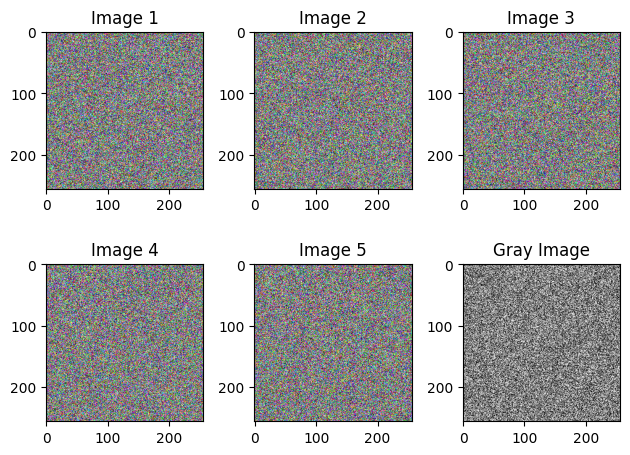

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have five images with shape (256, 256, 3) and one image with shape (256, 256)
image1 = np.random.random((256, 256, 3))
image2 = np.random.random((256, 256, 3))
image3 = np.random.random((256, 256, 3))
image4 = np.random.random((256, 256, 3))
image5 = np.random.random((256, 256, 3))
gray_image = np.random.random((256, 256))

# Create a figure and axis object

